# Parallel Workflow Circket Batsman 

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int


    strike_rate: float
    balls_per_boundary: float
    boundary_percentage: float
    summary: str
    


In [3]:
def calculate_strike_rate(state: BatsmanState):
    runs = state["runs"]
    balls = state["balls"]
    strike_rate = (runs/balls)*100

    return {"strike_rate": strike_rate}

In [4]:
def calculate_balls_per_boundary(state: BatsmanState):
    balls = state["balls"]
    fours = state["fours"]
    sixes = state["sixes"]

    balls_per_boundary = balls/(fours + sixes)
    return {"balls_per_boundary": balls_per_boundary}

In [5]:
def calculate_boundary_percentage(state: BatsmanState):
    fours = state["fours"]
    sixes = state["sixes"]
    total_runs = state["runs"]

    boundary_percentage = (((fours*4) + (sixes*6))/total_runs)*100
    return {"boundary_percentage": boundary_percentage}

In [6]:
def generate_summary(state: BatsmanState):
    strike_rate = state["strike_rate"]
    balls_per_boundary = state["balls_per_boundary"]
    boundary_percentage = state["boundary_percentage"]

    summary = f"""
    Strike Rate: {strike_rate:.2f} \n
    Balls per Boundary: {balls_per_boundary:.2f} \n
    Boundary Percentage: {boundary_percentage:.2f}
    """
    return {"summary": summary}

In [7]:
graph = StateGraph(BatsmanState)

graph.add_node("calculate_strike_rate", calculate_strike_rate)
graph.add_node("calculate_balls_per_boundary", calculate_balls_per_boundary)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("generate_summary", generate_summary)


graph.add_edge(START, "calculate_strike_rate")
graph.add_edge(START, "calculate_balls_per_boundary")
graph.add_edge(START, "calculate_boundary_percentage")

graph.add_edge("calculate_strike_rate", "generate_summary")
graph.add_edge("calculate_balls_per_boundary", "generate_summary")
graph.add_edge("calculate_boundary_percentage", "generate_summary")

graph.add_edge("generate_summary", END)

workflow = graph.compile()


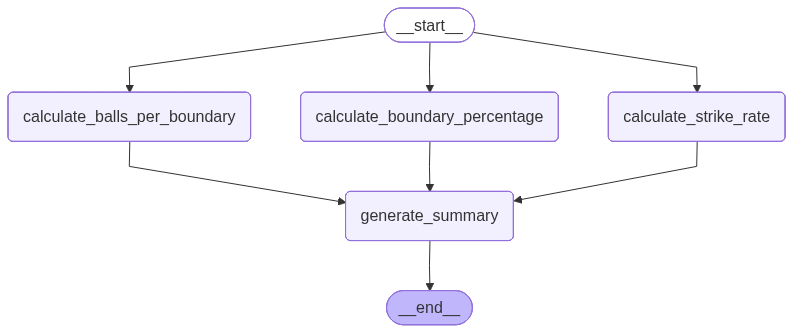

In [8]:
workflow

In [11]:
inital_state= {
    'runs': 100,
    'balls': 50,
    'fours' :10,
    'sixes' : 5
}

workflow.invoke(inital_state)


{'runs': 100,
 'balls': 50,
 'fours': 10,
 'sixes': 5,
 'strike_rate': 200.0,
 'balls_per_boundary': 3.3333333333333335,
 'boundary_percentage': 70.0,
 'summary': '\n    Strike Rate: 200.00 \n\n    Balls per Boundary: 3.33 \n\n    Boundary Percentage: 70.00\n    '}